In [63]:
import numpy as np
import sys 
import matplotlib.pyplot as plt

class P:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return str([self.x, self.y])
    
    def __repr__(self):
        return str([self.x, self.y])

with open('input.txt') as f:
    ftxt = f.read().strip()
    fl = ftxt.split('\n')
    field = []
    row = 0
    
    for l in fl: 
        ll = list(l)
        
        if ('S' in ll):
            col = ll.index('S')
            start = P(col, row)
            ll[col] = 'a'
        
        if ('E' in ll):
            col = ll.index('E')
            end = P(col, row)
            ll[col] = 'z'
        
        field.append([ord(i) - ord('a') for i in ll])
        row += 1

print(start, end)

[0, 20] [112, 20]


In [71]:
pos = start

width = len(field[0])
height = len(field)

visited  = np.zeros((height, width), dtype=bool)
distance = np.zeros((height, width), dtype=float)
distance[:] = np.inf
distance[pos.y, pos.x] = 0

unvisited = set()    
for y in range(height):
    for x in range(width):
        unvisited.add((x, y))
        
while True:
    
    # get neighbouring nodes
    for dy in [-1, 0, 1]:
        for dx in [-1, 0, 1]:
            tp = P(pos.x + dx, pos.y + dy)
            
            # Exlcude same point
            if tp.x == pos.x and tp.y == pos.y:
                continue

            # only horizontal/vertical -> exclude diagonal
            if tp.x != pos.x and tp.y != pos.y:
                continue
            
            # don't leave grid
            if (tp.x < 0 or tp.x >= width):
                continue
            if (tp.y < 0 or tp.y >= height):
                continue
                
            if visited[tp.y, tp.x]:
                continue
            
            pos_value = field[pos.y][pos.x]
            tp_value = field[tp.y][tp.x]
                        
            if (0 <= tp_value <= (pos_value+1)):
                cost = distance[pos.y, pos.x] + 1
                if cost < distance[tp.y, tp.x]:
                    distance[tp.y, tp.x] = cost
    
    visited[pos.y, pos.x] = True
    unvisited.remove((pos.x, pos.y))
    
    if (pos.y == end.y and pos.x == end.x):
        print(distance[pos.y, pos.x])
        break
    
    # find unvisited pos with lowest distance
    lowest_distance = np.inf
    for pt in unvisited:
        p = P(pt[0], pt[1])
        if (distance[p.y, p.x] <= lowest_distance):
            pos = p
            lowest_distance = distance[p.y, p.x]
    
    if (lowest_distance == np.inf):
        print("no route")
        break

456.0


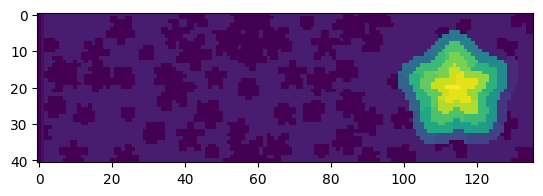

In [73]:
plt.imshow(field)
plt.show()

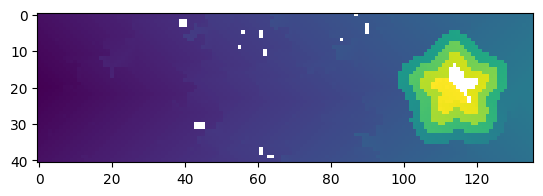

In [74]:
plt.imshow(distance)
plt.show()

In [ ]:
width = len(field[0])
height = len(field)

# the only b's in the area are only in col 1
# so we only need to look at the a's from col 0
all_a = []
for y in range(height):
    all_a.append(P(0, y))
    #for x in range(width):
    #    if (field[y][x] == 0):
    #        all_a.append(P(x, y))
a_dists = []

i = 0
for a in all_a:
    i += 1
    print(i, len(all_a))
    pos = a
    visited  = np.zeros((height, width), dtype=bool)
    distance = np.zeros((height, width), dtype=float)
    distance[:] = np.inf
    distance[pos.y, pos.x] = 0

    unvisited = set()    
    for y in range(height):
        for x in range(width):
            unvisited.add((x, y))

    while True:

        # get neighbouring nodes
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                tp = P(pos.x + dx, pos.y + dy)

                # Exlcude same point
                if tp.x == pos.x and tp.y == pos.y:
                    continue

                # only horizontal/vertical -> exclude diagonal
                if tp.x != pos.x and tp.y != pos.y:
                    continue

                if (tp.x < 0 or tp.x >= width):
                    continue
                if (tp.y < 0 or tp.y >= height):
                    continue

                if visited[tp.y, tp.x]:
                    continue

                pos_value = field[pos.y][pos.x]
                tp_value = field[tp.y][tp.x]

                if (0 <= tp_value <= (pos_value+1)):
                    cost = distance[pos.y, pos.x] + 1
                    if cost < distance[tp.y, tp.x]:
                        distance[tp.y, tp.x] = cost

        visited[pos.y, pos.x] = True
        unvisited.remove((pos.x, pos.y))

        if (pos.y == end.y and pos.x == end.x):
            a_dists.append(distance[pos.y, pos.x])
            break

        # find unvisited pos with lowest distance
        lowest_distance = np.inf
        for pt in unvisited:
            p = P(pt[0], pt[1])
            if (distance[p.y, p.x] <= lowest_distance):
                pos = p
                lowest_distance = distance[p.y, p.x]

        if (lowest_distance == np.inf):
            print("no route")
            break


In [76]:
print(min(a_dists))

454.0
